## 0_Importações_DefenseDroid (2021) com duplicatas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tirando limites de exibição de linhas e colunas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
droid = pd.read_csv('../../2_Permissions_Only_Subsets/Duplicates/Permission_DefenseDroid (duplicates).csv')

## 1_Exploração_de_Dados

In [3]:
droid.drop(columns=['Unnamed: 0'], inplace=True)
droid.head()

,ACCESS_BACKGROUND_LOCATION,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_NETWORK_STATE,ACCESS_NOTIFICATION_POLICY,ACCESS_SURFACE_FLINGER,ACCESS_WIFI_STATE,ACCOUNT_MANAGER,ACTIVITY_RECOGNITION,ADD_SYSTEM_SERVICE,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,AUTHENTICATE_ACCOUNTS,BATTERY_STATS,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_CARRIER_MESSAGING_SERVICE,BIND_CHOOSER_TARGET_SERVICE,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_INPUT_METHOD,BIND_NFC_SERVICE,BIND_NOTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_REMOTEVIEWS,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BRICK,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CAPTURE_SECURE_VIDEO_OUTPUT,CAPTURE_VIDEO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURATION,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE,CLEAR_APP_CACHE,CLEAR_APP_USER_DATA,CONTROL_LOCATION_UPDATES,DELETE_CACHE_FILES,DELETE_PACKAGES,DEVICE_POWER,DIAGNOSTIC,DISABLE_KEYGUARD,DUMP,EXPAND_STATUS_BAR,FACTORY_TEST,FLASHLIGHT,FORCE_BACK,FOREGROUND_SERVICE,GET_ACCOUNTS,GET_PACKAGE_SIZE,GET_TASKS,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,HARDWARE_TEST,INJECT_EVENTS,INSTALL_LOCATION_PROVIDER,INSTALL_SHORTCUT,INTERNAL_SYSTEM_WINDOW,KILL_BACKGROUND_PROCESSES,LOCATION_HARDWARE,MANAGE_ACCOUNTS,MANAGE_APP_TOKENS,MANAGE_DOCUMENTS,MANAGE_OWN_CALLS,MEDIA_CONTENT_CONTROL,MICROPHONE,MOUNT_FORMAT_FILESYSTEMS,NFC,PACKAGE_USAGE_STATS,PERSISTENT_ACTIVITY,PROCESS_OUTGOING_CALLS,READ_CALL_LOG,READ_EXTERNAL_STORAGE,READ_FRAME_BUFFER,READ_HISTORY_BOOKMARKS,READ_INPUT_STATE,READ_OWNER_DATA,READ_PHONE_NUMBERS,READ_PROFILE,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,READ_VOICEMAIL,REQUEST_DELETE_PACKAGES,REQUEST_IGNORE_BATTERY_OPTIMIZATIONS,REQUEST_INSTALL_PACKAGES,RESTART_PACKAGES,SEND_RESPOND_VIA_MESSAGE,SET_ACTIVITY_WATCHER,SET_ALARM,SET_ORIENTATION,SET_POINTER_SPEED,SET_PREFERRED_APPLICATIONS,SET_PROCESS_FOREGROUND,SET_TIME,STATUS_BAR,SUBSCRIBED_FEEDS_READ,SUBSCRIBED_FEEDS_WRITE,TRANSMIT_IR,UNINSTALL_SHORTCUT,UPDATE_DEVICE_STATS,USE_BIOMETRIC,USE_CREDENTIALS,USE_FINGERPRINT,USE_FULL_SCREEN_INTENT,USE_SIP,WRITE_CALL_LOG,WRITE_EXTERNAL_STORAGE,WRITE_HISTORY_BOOKMARKS,WRITE_OWNER_DATA,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_USER_DICTIONARY,WRITE_VOICEMAIL,class
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1


**Quantidade de aplicativos benignos e malignos**

[Text(0.5, 0, ''), Text(0, 0.5, '')]

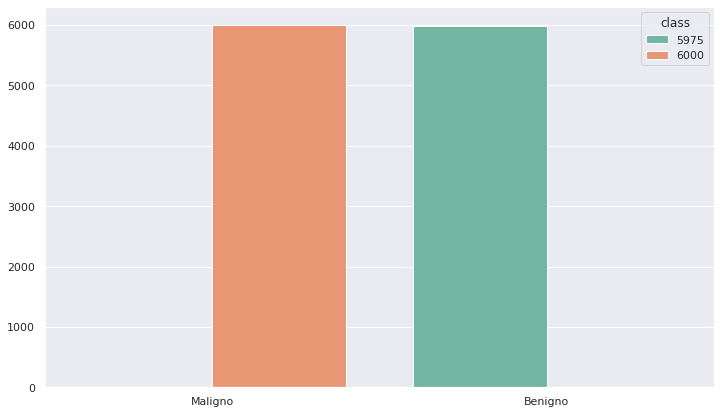

In [4]:
number = droid['class'].value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Maligno","Benigno"], y = number, hue = number, palette = "Set2").set(xlabel='', ylabel='')

**Proporção de benignos e maligos**

In [5]:
number

1    6000
0    5975
Name: class, dtype: int64

In [6]:
proportion = number[0] / number[1]
print('Maligno 1 : %.2f Benignos'%proportion)

Maligno 1 : 1.00 Benignos


**Top 5 permissões mais utilizadas por benignos e malignos**

In [7]:
permissions_class_sum = droid.groupby('class').sum().loc[:,]
permissions_ben = permissions_class_sum.loc[0].sort_values(ascending=False)[:5]
permissions_mal = permissions_class_sum.loc[1].sort_values(ascending=False)[:5]

In [ ]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=permissions_ben.index, x=permissions_ben.values, palette="Blues_r", ax=axs[0])
axs[0].set_title('Top 5 permissões requeridas por apps Benignos')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=permissions_mal.index, x=permissions_mal.values, palette='Reds_r', ax=axs[1])
axs[1].set_title('Top 5 permissões requeridas por apps Malignos')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

**Top 10 permissões mais requeridas**

In [ ]:
permissions_sum = droid.sum().loc[:,]
permissions_sum.sort_values(ascending=False)

ACCESS_NETWORK_STATE                    11411
WRITE_EXTERNAL_STORAGE                  10124
class                                    6000
ACCESS_COARSE_LOCATION                   5578
READ_EXTERNAL_STORAGE                    5356
GET_TASKS                                4901
GET_ACCOUNTS                             4142
CHANGE_WIFI_STATE                        4086
CAMERA                                   3852
CHANGE_NETWORK_STATE                     2792
INSTALL_SHORTCUT                         2305
BLUETOOTH                                2201
CALL_PHONE                               2088
MANAGE_ACCOUNTS                          1586
USE_CREDENTIALS                          1542
DISABLE_KEYGUARD                         1481
ACCESS_LOCATION_EXTRA_COMMANDS           1452
RESTART_PACKAGES                         1400
BLUETOOTH_ADMIN                          1391
FLASHLIGHT                               1252
BROADCAST_STICKY                         1242
UNINSTALL_SHORTCUT                

In [ ]:
top_permissions_sum = permissions_sum.loc[:].sort_values(ascending=False)[:10]

<AxesSubplot:>

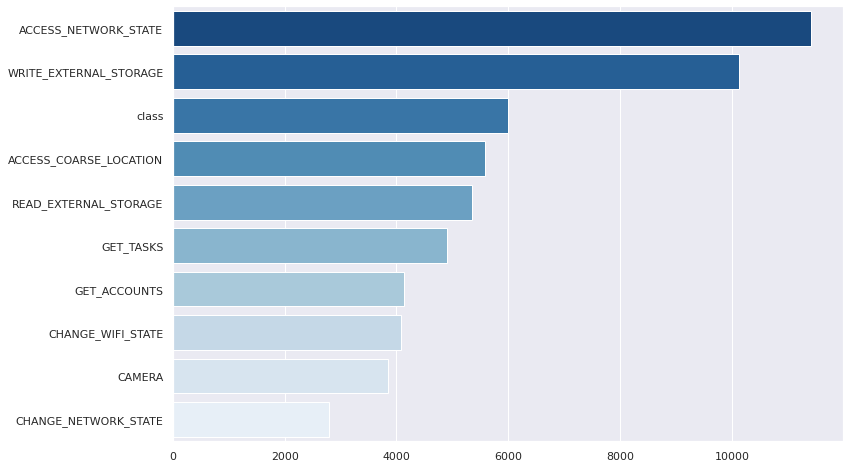

In [ ]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=1, sharex=True)

sns.barplot(y=top_permissions_sum.index, x=top_permissions_sum.values, palette="Blues_r")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3230624e-876d-4f9f-a1ca-0058a560220a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>